# <span style='color:red'> Linear Reg, SVR, DTR and RFR for CarDekho dataset/HPT_Cardekho </span>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### To be able to see maximum columns on screen
pd.set_option('display.max_columns',500)

In [2]:
data = pd.read_csv("desktop/Datasets/cardekho_dataset.csv" ,usecols=['car_name','brand','model','vehicle_age','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats','selling_price'])
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
### dropping brand and model as these details are present in car_name feature
data.drop(['brand','model'],inplace=True,axis=1)


In [4]:
data.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(0.25)
    third_quartile = in_data[in_col].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [6]:
### getting list of continuous features
Continuous_feature= [feature for feature in [feature for feature in data.columns if data[feature].dtypes!='O'] if len(data[feature].unique())>25]
Continuous_feature                 

['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']

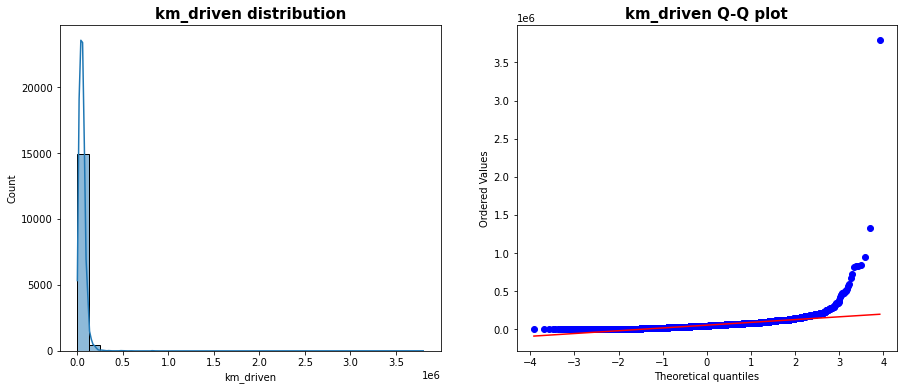

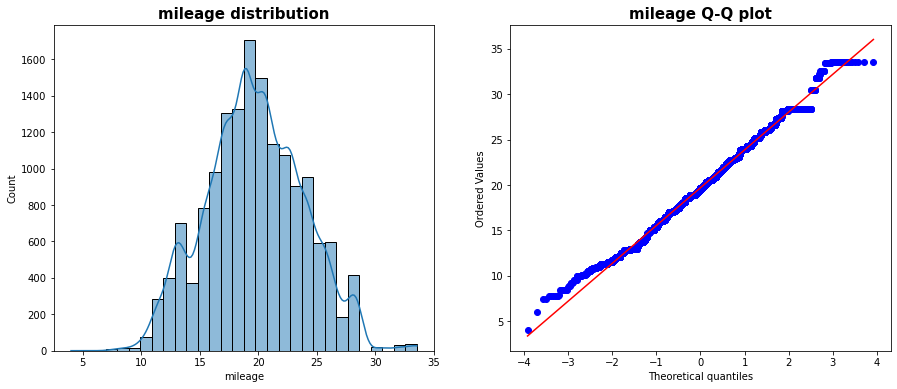

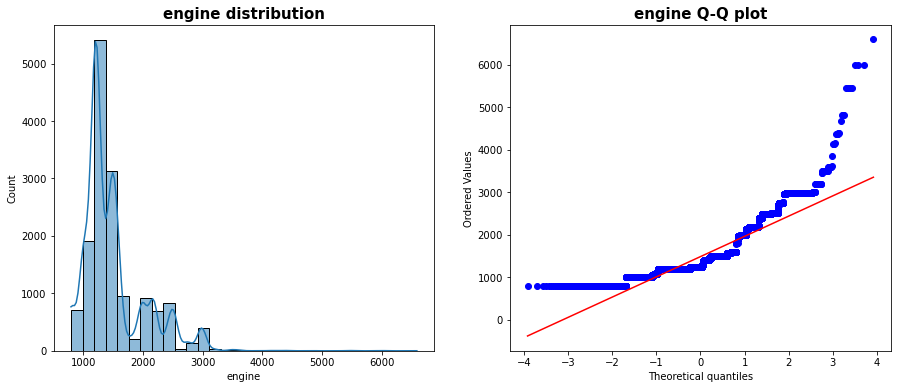

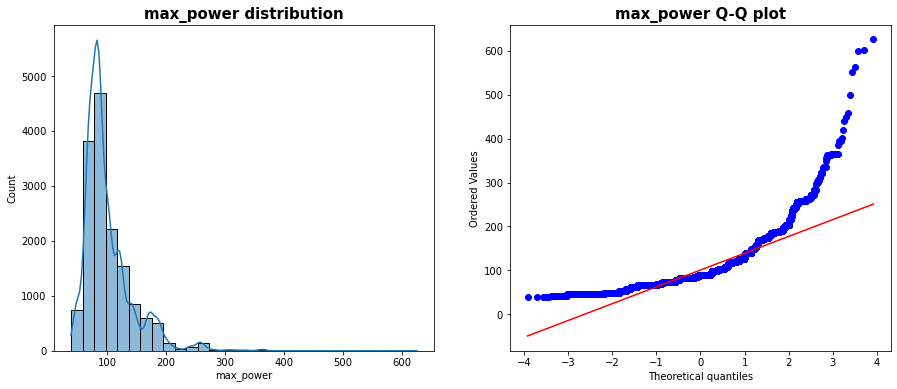

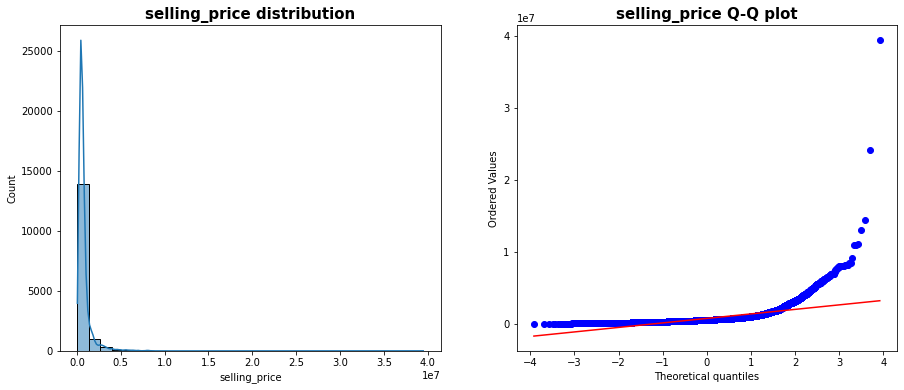

In [7]:
### Checking distribution of continuous features before outlier capping
for feature in Continuous_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data,x=feature,kde=True,bins=30)
    plt.title('{} distribution'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(data[feature], dist='norm', plot=plt)
    plt.title('{} Q-Q plot'.format(feature),fontsize=15,fontweight='bold')
plt.show();

In [8]:
### Capping outliers from continuous features
for feature in Continuous_feature:
    data= remove_outliers(data, feature)

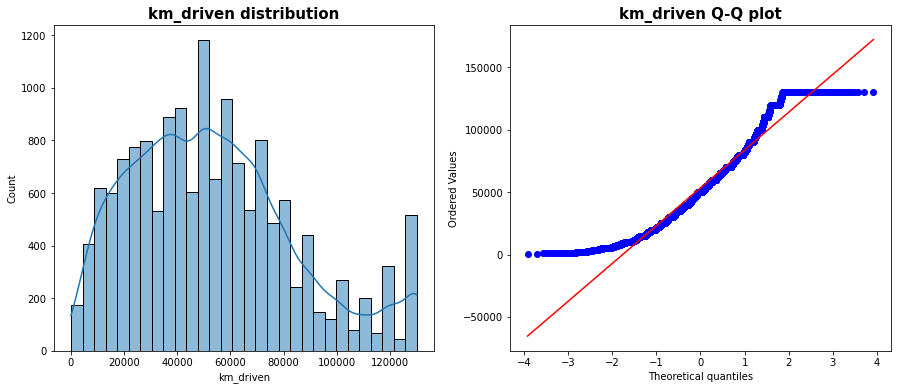

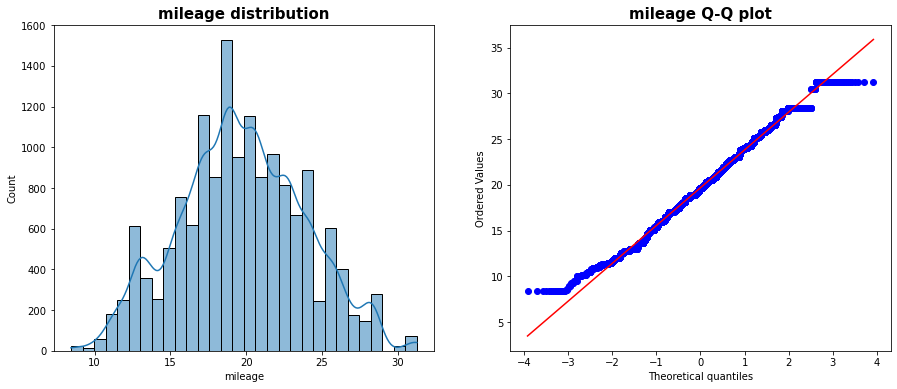

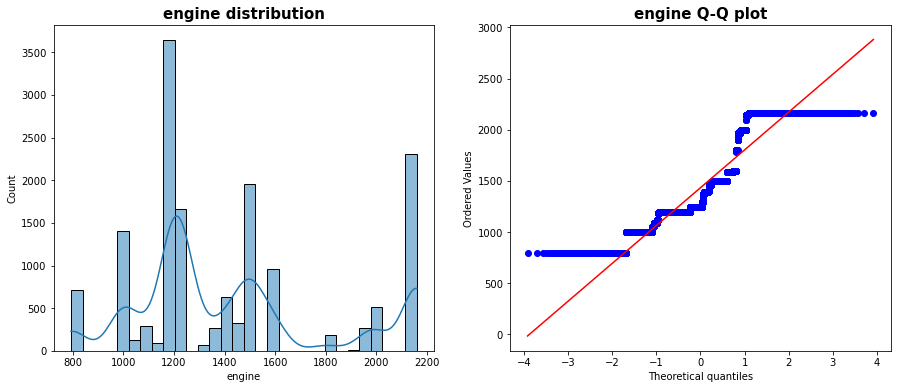

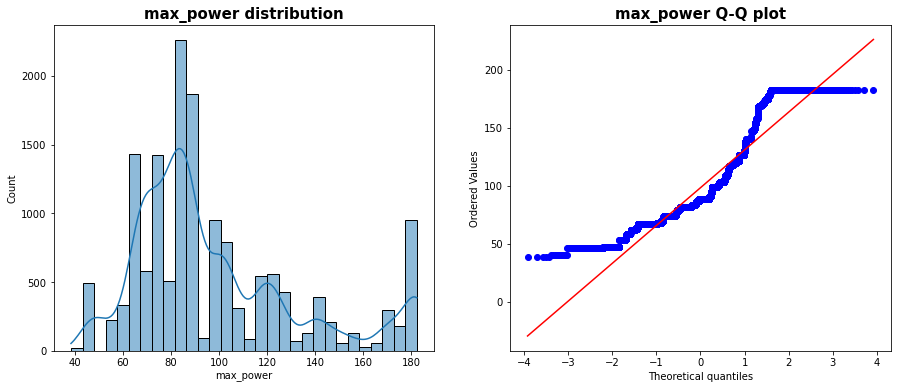

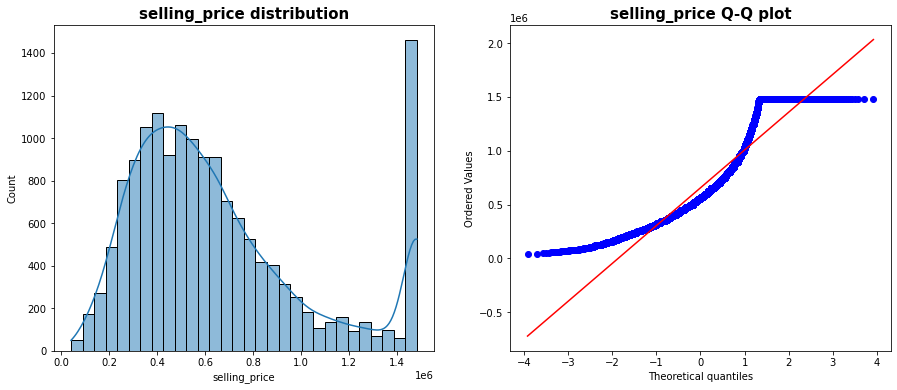

In [9]:
### Checking distribution of continuous features after outlier capping
for feature in Continuous_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data,x=feature,kde=True,bins=30)
    plt.title('{} distribution'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(data[feature], dist='norm', plot=plt)
    plt.title('{} Q-Q plot'.format(feature),fontsize=15,fontweight='bold')
plt.show();

In [10]:
### creating list of features for scaling and encoding
Numerical_features= [feature for feature in data.columns if data[feature].dtypes !='O' and feature not in ['selling_price']]
onehot_enc_col= ['seller_type','fuel_type','transmission_type']
binary_enc_col= ['car_name']

In [11]:
### Standard scalar Object for feature scaling
Scalar = StandardScaler()

### one hot encoder object for 2 or 3 categories at max
onehot_enc= OneHotEncoder()


### using binary encoder for car_name feature as this has many categories
binary_enc = BinaryEncoder()

### Creating column transformer to implement above objects
column_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", onehot_enc, onehot_enc_col),
         ("StandardScaler", Scalar, Numerical_features),
        ("BinaryEncoder", binary_enc, binary_enc_col)
        
    ]
)


In [12]:
### Splitting independent and dependent features
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
X.head(3)

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.7,796.0,46.3,5
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.9,1197.0,82.0,5
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.0,1197.0,80.0,5


In [14]:
y.head(3)

0    120000
1    550000
2    215000
Name: selling_price, dtype: int64

In [15]:
### random state train test split will be same with all people using random_state=42
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
11210,Volvo XC60,7,70252,Dealer,Diesel,Automatic,11.20,2159.5,182.25,5
1347,Tata Tiago,2,10000,Individual,Petrol,Manual,23.84,1199.0,84.00,5
10363,Mercedes-Benz CLS,2,6000,Dealer,Diesel,Automatic,19.00,1950.0,182.25,5
316,Honda City,7,63000,Dealer,Petrol,Manual,17.80,1497.0,117.30,5
10638,Hyundai i10,10,80292,Dealer,Petrol,Manual,20.36,1197.0,78.90,5


In [17]:
y_train.head()

11210    1485000
1347      515000
10363    1485000
316       435000
10638     200000
Name: selling_price, dtype: int64

In [18]:
X_test.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
3334,Hyundai i10,12,73000,Dealer,Petrol,Manual,20.36,1197.0,78.90,5
10928,Maruti Baleno,4,58000,Individual,Diesel,Manual,27.39,1248.0,74.00,5
2518,Maruti Ertiga,7,96000,Dealer,Diesel,Manual,20.77,1248.0,88.76,7
11322,Honda City,1,4500,Dealer,Petrol,Automatic,18.40,1498.0,119.35,5
9394,Maruti Alto,11,62000,Dealer,Petrol,Manual,19.70,796.0,46.30,5


In [19]:
y_test.head()

3334      190000
10928     600000
2518      665000
11322    1485000
9394      160000
Name: selling_price, dtype: int64

In [20]:
(X_train.shape,y_train.shape)

((12328, 10), (12328,))

In [21]:
(X_test.shape,y_test.shape)

((3083, 10), (3083,))

In [22]:
X_train=column_transformer.fit_transform(X_train)
X_train

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [23]:
X_test= column_transformer.transform(X_test)
X_test

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [24]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val, X_test_val):
    """
    The function takes actual value, predicted value and X test value as 
    argument and returns Mean square error, Mean absolute error, Root 
    mean square error, r2 score and adjusted r2 score rounded to 3 decimal 
    places.
    """
    mse=round(mean_squared_error(actual_val, pred_val),3)
    mae=round(mean_absolute_error(actual_val, pred_val),3)
    rmse=round(np.sqrt(mean_squared_error(actual_val, pred_val)),3)
    r2_sco=round(r2_score(actual_val, pred_val),3)
    adj_r2_sco=round(1-(1-r2_sco)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)
    return mse, mae, rmse, r2_sco, adj_r2_sco

In [25]:
### Creating function for model training

def model_trainer(model,X_train_data,y_train_data,X_test_data):
    """
    This function takes model object, X train data, y train data, and 
    X test data as argument, trains model and gives prediction for train data 
    and prediction for test data.
    """
    model.fit(X_train_data,y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_values=model.predict(X_test_data)
    return (y_train_pred,pred_values)

# <span style='color:red'> Performing hyper parameter tuning for Random Forest Regressor, Decision Tree Regressor and Support Vector Classifier</span>

In [26]:
rfr_params={'n_estimators':[100,200, 500],
           'max_depth': [None, 5,10,15],
           'min_samples_leaf': [5,10,15,20]}

dtr_params={'max_depth': [None, 5,10,15],
           'min_samples_leaf': [5,10,15,20],
            'max_features': ['sqrt', 'log2']}

svr_params={'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
            'degree': [1,2,3,5,10],
            'gamma': ['scale', 'auto']}


In [27]:
model_list_grid= [('RFR',RandomForestRegressor(),rfr_params),
                  ('DTR',DecisionTreeRegressor(),dtr_params),
                 ('SVR',SVR(),svr_params)]

In [28]:
model_param={}
for name, model, params in model_list_grid:
    grid=GridSearchCV(estimator=model,
                    param_grid=params,
                    cv=2, 
                    verbose=2)
    grid.fit(X_train,y_train)
    model_param[name]=grid.best_params_

for model_name in model_param:
    print("Best param for {} is {}".format(model_name, model_param[model_name]))
    print(model_param[model_name])

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=200; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=200; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=500; total time=  12.2s
[CV] END max_depth=None, min_samples_leaf=5, n_estimators=500; total time=  12.0s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=200; total time=   5.4s
[CV] END max_depth=None, min_samples_leaf=10, n_estimators=500; total time=  11.5s
[CV] END max_depth=None, min_sam

In [30]:
models={
    "Random Forest Regressor": RandomForestRegressor(**model_param['RFR']),
    "Decision Tree Regressor": RandomForestRegressor(**model_param['DTR']),
    "Support Vector Regressor": SVR(**model_param['SVR'])
}
### Creating empty list to store model names
model_list=[]
### creating empty list to store r2 score for each model
r2_score_list=[]
### creating empty list for storing adjusted r2 score
adj_r2_score=[]
### creating list to store mse
mse_list=[]
### creating list to store mae
mae_list=[]
### creating list to store rmse
rmse_list=[]

In [31]:
### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]
    
    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_train,y_pred,X_train )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    print("-"*50)
    
    ### Getting model performance parameters for test data
    mse, mae, rmse, r2_sco, adj_r2_sco=model_evaluator(y_test,pred_val,X_test )
    print("Model Performance for Test dataset")
    print("Mean Square Error: {}\nMean Absolute Error: {}\nRoot Mean Square Error: {}\nR2 Score: {}\nAdjusted R2 Score: {}".format(mse,mae, rmse, r2_sco, adj_r2_sco))
    
    ### Appending model name and R2 Score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    r2_score_list.append(r2_sco)
    adj_r2_score.append(adj_r2_sco)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    print("*"*50)
    print("\n")

Random Forest Regressor Model

Model Performance for training dataset
Mean Square Error: 5416870489.918
Mean Absolute Error: 50008.78
Root Mean Square Error: 73599.392
R2 Score: 0.96
Adjusted R2 Score: 0.96
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 9808411932.848
Mean Absolute Error: 65813.598
Root Mean Square Error: 99037.427
R2 Score: 0.933
Adjusted R2 Score: 0.932
**************************************************


Decision Tree Regressor Model

Model Performance for training dataset
Mean Square Error: 7675963755.88
Mean Absolute Error: 62021.48
Root Mean Square Error: 87612.578
R2 Score: 0.944
Adjusted R2 Score: 0.944
--------------------------------------------------
Model Performance for Test dataset
Mean Square Error: 10380345635.801
Mean Absolute Error: 71462.095
Root Mean Square Error: 101883.981
R2 Score: 0.929
Adjusted R2 Score: 0.928
**************************************************


Support Vector Regressor 

In [34]:
### Tabulating model performance in dataframe
model_performance = pd.DataFrame(list(zip(model_list,r2_score_list,mse_list,mae_list,rmse_list,adj_r2_score)),columns=['Model','r2_score','mse','mae','rmse','adj_r2_score'])
model_performance

,Model,r2_score,mse,mae,rmse,adj_r2_score
0,Random Forest Regressor,0.933,9.808412e+09,65813.598,99037.427,0.932
1,Decision Tree Regressor,0.929,1.038035e+10,71462.095,101883.981,0.928
2,Support Vector Regressor,0.093,1.324136e+11,269408.173,363886.772,0.086
